# Verification of Operation

## Autapse Cusp Bifurcation

In [3]:
from rnn import CTRNN
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# 4 neurons
n = 1

# 2 inputs
n_in = 1
n_out = 1
T = 1000
period = 100
pump1 = [1.e-2 for t in range(T)]

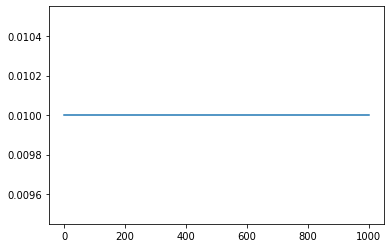

In [2]:
plt.plot(list(range(T)), pump1)
plt.show()

In [3]:
network_params = {
    'number of neurons': n,
    'number of inputs': n_in,
    'number of outputs': n_out,
    'integration mode': 'RK4',
    'time step': 1.0e-6,
    'decay constant': 0.5e-4,
    'activation': 'Sigmoid',
    'randomize weights': False
}

In [41]:
ctrnn = CTRNN(**network_params)
inputs = [pump1]

In [42]:
ctrnn.forward(inputs)

In [43]:
output = ctrnn.output_sequence[0]

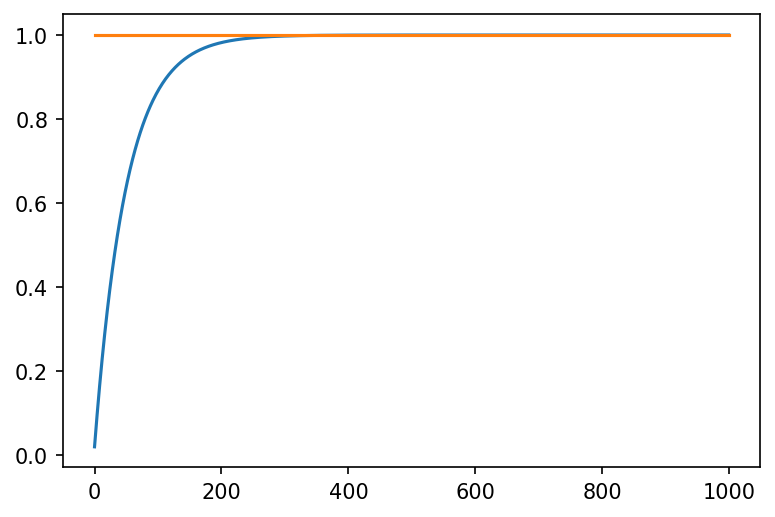

In [44]:
import matplotlib.pyplot as plt
plt.figure(dpi=150)
mo = max(output)
plt.plot(list(range(T)), [o/mo for o in output])
m1 = max(pump1)
plt.plot(list(range(T)), [p/m1 for p in pump1])
plt.show()

In [57]:
W = 1e8
N_W = 25
outputs = []
for w in np.linspace(0,W,N_W):
    weights = np.array([[w]])
    network_params = {
        'number of neurons': n,
        'number of inputs': n_in,
        'number of outputs': n_out,
        'integration mode': 'RK4',
        'time step': 1.0e-6,
        'decay constant': 1.0e-4,
        'activation': 'Sigmoid',
        'randomize weights': False,
        'weight matrix': weights
    }
    ctrnn = CTRNN(**network_params)
    pump1 = [1.e-3 for t in range(T)]
    inputs = [pump1]
    ctrnn.forward(inputs)
    output = ctrnn.output_sequence[0]
    outputs.append(output)

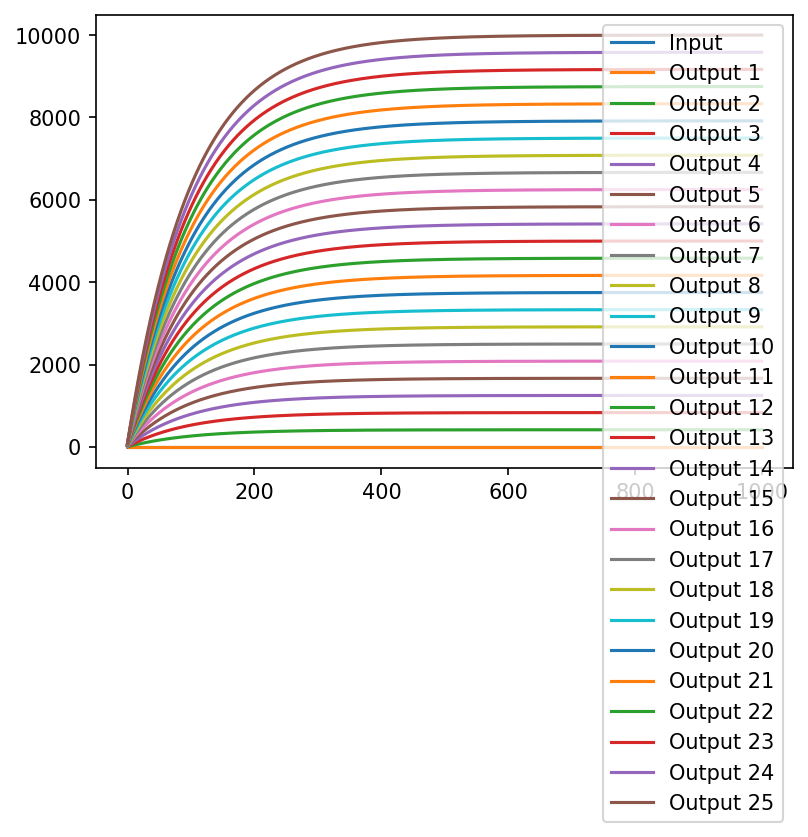

In [58]:
plt.figure(dpi=150)
m1 = 1#max(pump1)
plt.plot(list(range(T)), [p/m1 for p in pump1], label='Input')
for i,o_wvfrm in enumerate(outputs):
    mo = 1#max(o_wvfrm)
    plt.plot(list(range(T)), [o/mo for o in o_wvfrm], label='Output {}'.format(i+1))
plt.legend()
plt.show()

## Hopf Bifurcation

In [6]:
W_i = 0.5
W_f = 1

I_i = 0
I_f = 1

N = 10
outputs = []
T = 1500
n = 2
for init_state in np.linspace(I_i,I_f,N):
    outputs.append([])
    for w in np.linspace(W_i,W_f,N):
        weights = np.array([[w, -1], [1, w]])
        network_params = {
            'number of neurons': n,
            'number of inputs': n,
            'number of outputs': n,
            'initial state': np.array([init_state, 0]),
            'integration mode': 'RK4',
            'time step': 0.01,
            'decay constant': 1.0,
            'activation': 'Sigmoid',
            'randomize weights': False,
            'weight matrix': weights
        }
        ctrnn = CTRNN(**network_params)
        inputs = [[0 for _ in range(T)] for _ in range(2)]
        ctrnn.forward(inputs)
        output = ctrnn.output_sequence
        outputs[-1].append(output)

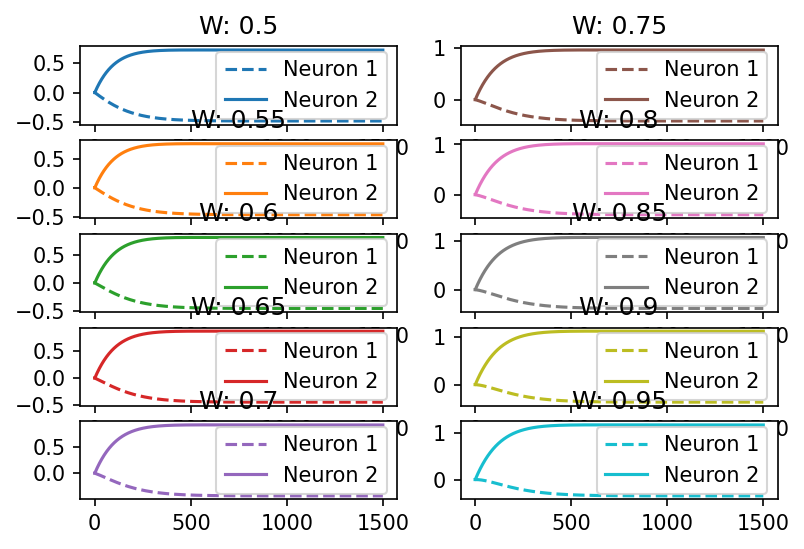

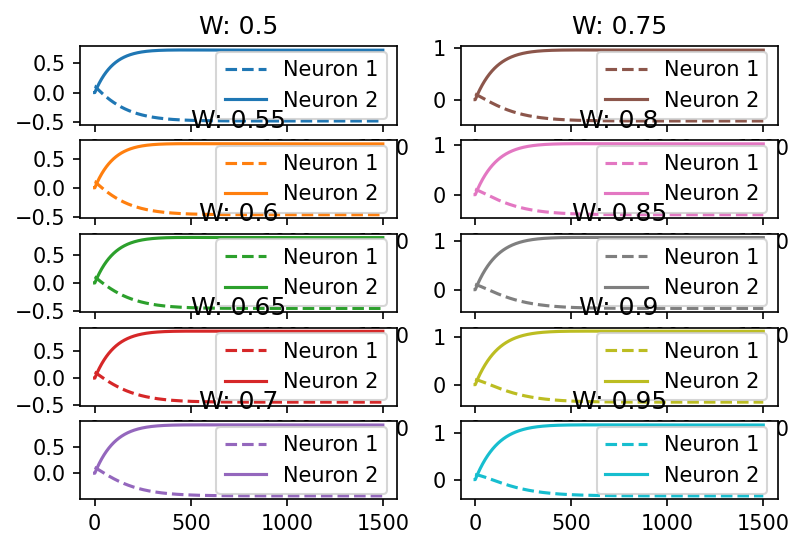

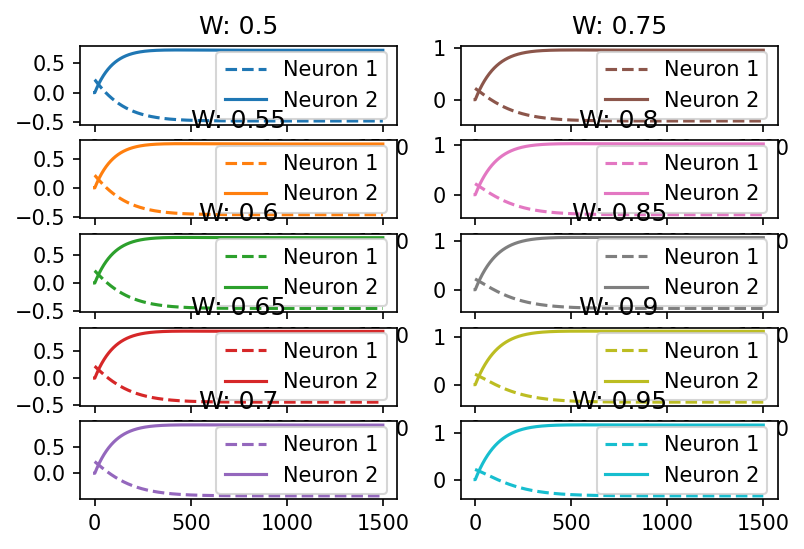

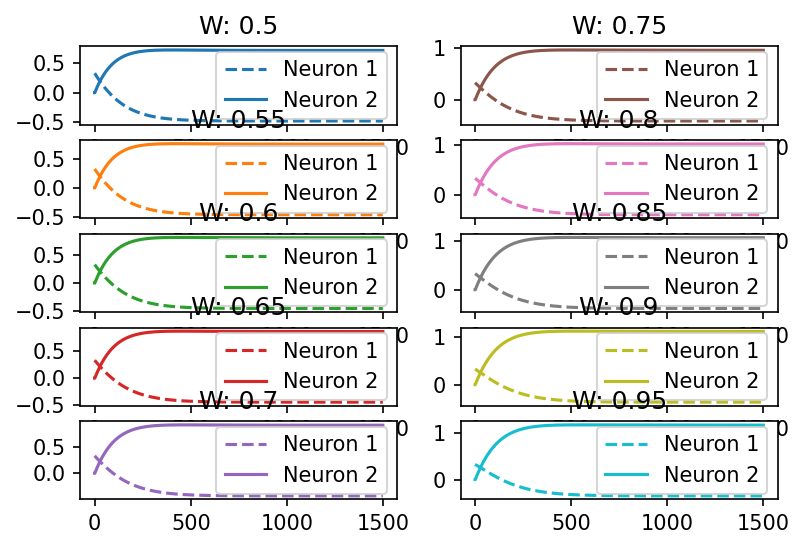

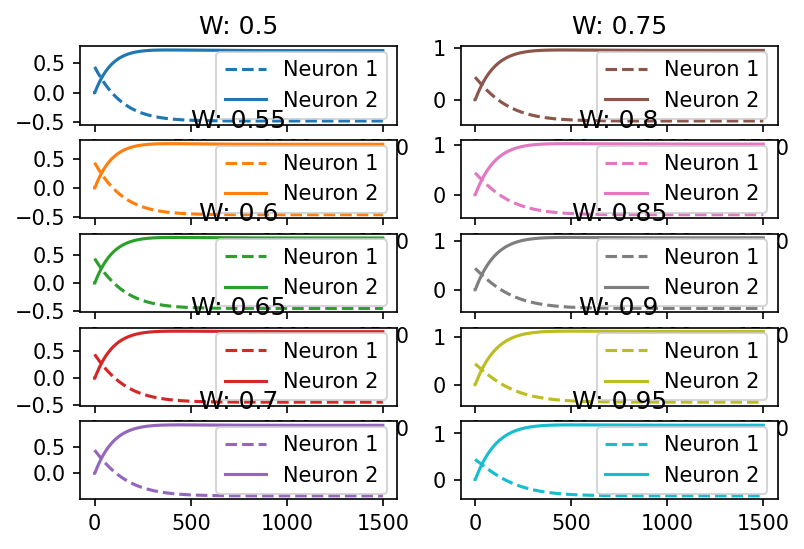

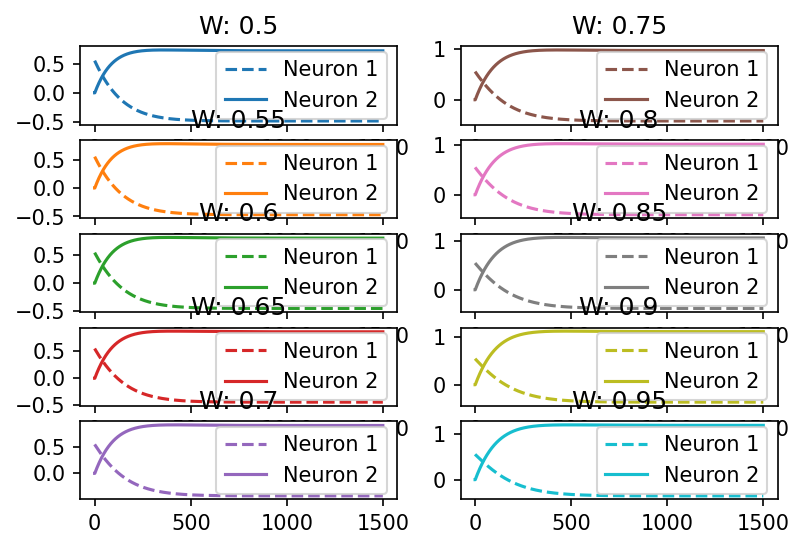

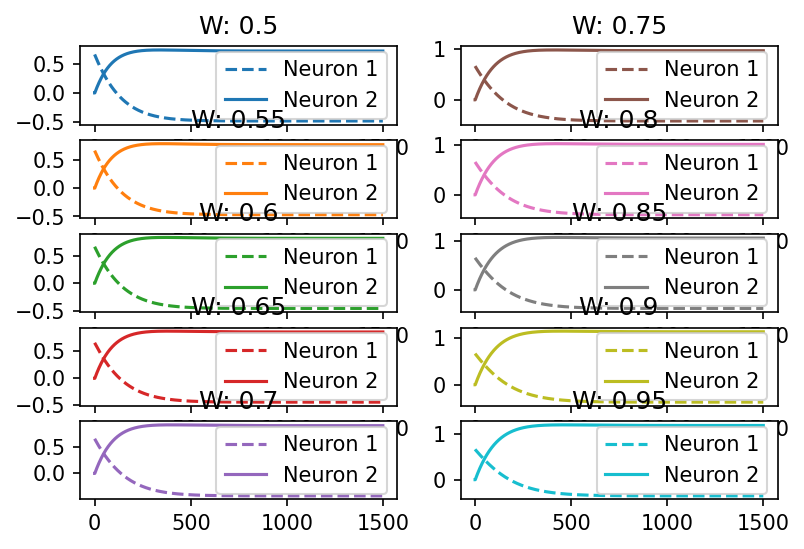

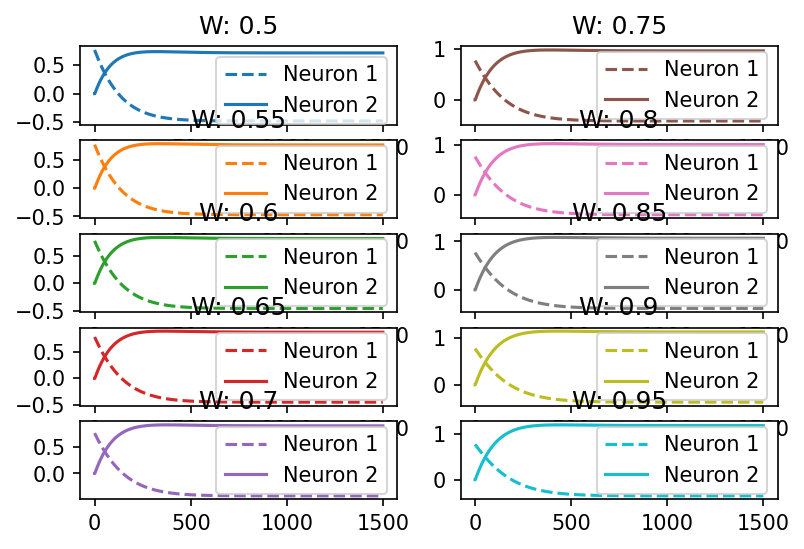

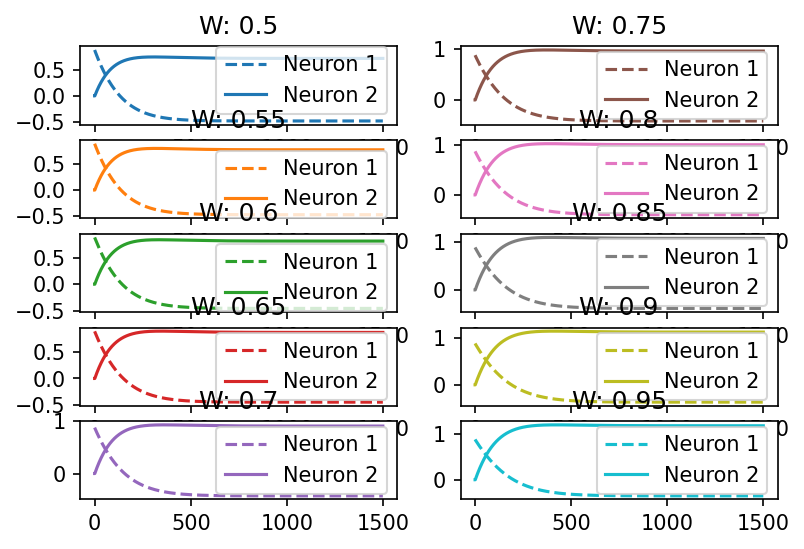

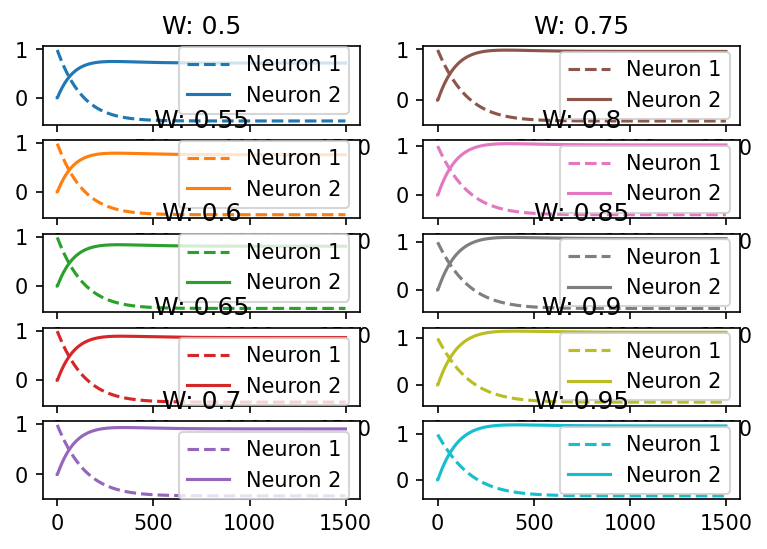

In [7]:
for i, state in enumerate(outputs):
    fig, axs = plt.subplots(5, 2, dpi=150)
    for j, weight in enumerate(state):
        axs[j%5,j//5].plot(list(range(T)), weight[0], '--C{}'.format(j%10), label='Neuron 1')
        axs[j%5,j//5].plot(list(range(T)), weight[1], '-C{}'.format(j%10), label='Neuron 2')
        axs[j%5,j//5].set_title('W: {}'.format(j*(W_f-W_i)/N+W_i))
        axs[j%5,j//5].legend()
plt.show()
